In [1]:
# Import pandas for manipulating numerical tables
import pandas as pd

# Import numpy for numerical calculations
import numpy as np

# Import matplotlib for plotting data
import matplotlib.pyplot as plt
#%matplotlib inline

# Import scipy-stats for statistical analysis and outlier detection
from scipy import stats as st

# Import missingno for visualizations
import missingno as msno

# Import for splitting model
from sklearn.model_selection import train_test_split

# Import for VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import to show python version
from platform import python_version

# Import for model variable reduction
from sklearn.feature_selection import SelectKBest

# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import scoring function to use in GridSearchCV
from sklearn.metrics import make_scorer

# Import for MSE
from sklearn.metrics import mean_squared_error as mse

# Import for the r2
from sklearn.metrics import r2_score

# Import for mean absolute error score
from sklearn.metrics import mean_absolute_error

# Model precision
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
print('Python version used for this analysis is: ', python_version())

Python version used for this analysis is:  3.9.13


In [3]:
# Importing the churn dataset
df = pd.read_csv('C:/users/eric7/D209/churn_clean.csv')

In [4]:
# Just checking to see if the data is there
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [5]:
# Check shape of df
print(df.shape)
# 10000 rows or instances and 50 columns or variables

(10000, 50)


In [6]:
# Check df info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

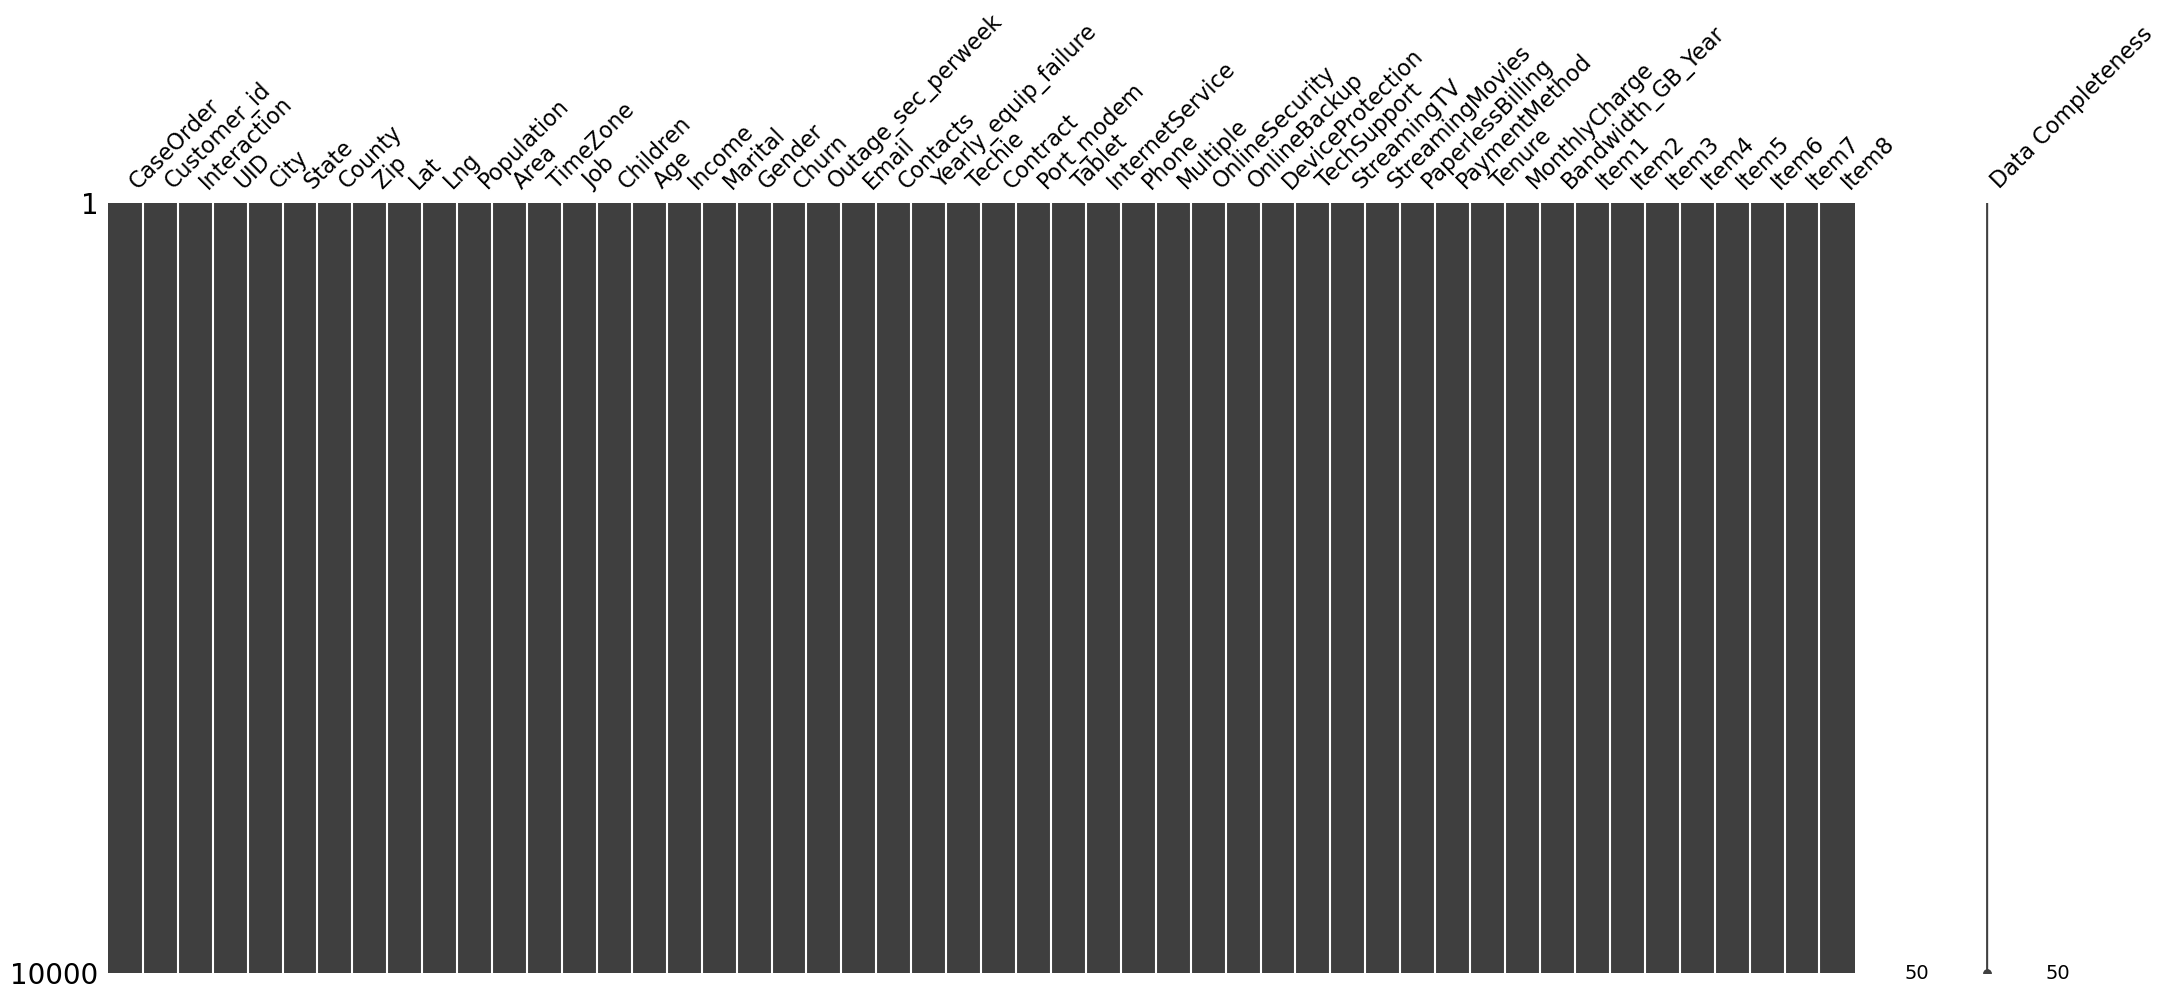

In [7]:
# Visualize df for missingness
msno.matrix(df, labels = True)
plt.show()

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Create a copy of df to preserve original
df1 = df.copy()

In [10]:
# Create df1 for initial model--
# Dropping columns CaseOrder, Customer_id, Interaction_UID, City,
# State, County, Zip, Lat, Lng, TimeZone, Job, and Item1 thru Item8
df1 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year']]

In [11]:
# Check the info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  int64  
 1   Area                  10000 non-null  object 
 2   Children              10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Marital               10000 non-null  object 
 6   Gender                10000 non-null  object 
 7   Churn                 10000 non-null  object 
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Techie                10000 non-null  object 
 13  Contract              10000 non-null  object 
 14  Port_modem            10000 non-null  object 
 15  Tablet              

In [12]:
# Checking shape for initial model
df1.shape

(10000, 30)

In [13]:
# Checking variables unique values for validity
print(df1['Population'].sort_values().unique())

[     0      2      4 ... 102433 103732 111850]


In [14]:
# Check before replacement
df1['Population'].describe()

count     10000.000000
mean       9756.562400
std       14432.698671
min           0.000000
25%         738.000000
50%        2910.500000
75%       13168.000000
max      111850.000000
Name: Population, dtype: float64

In [15]:
# Checking variables unique values for validity
print(df1['Area'].sort_values().unique())

['Rural' 'Suburban' 'Urban']


In [16]:
# Check before replacement
df1['Area'].describe()

count        10000
unique           3
top       Suburban
freq          3346
Name: Area, dtype: object

In [17]:
# Get the counts for each
df1['Area'].value_counts()

Suburban    3346
Urban       3327
Rural       3327
Name: Area, dtype: int64

In [18]:
# Checking variables unique values for validity
print(df1['Children'].sort_values().unique())

[ 0  1  2  3  4  5  6  7  8  9 10]


In [19]:
# Get statistics of the variable
df1['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [20]:
# Checking variables unique values for validity
print(df1['Age'].sort_values().unique())

[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65
 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]


In [21]:
# Get statistics of the variable
df1['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [22]:
# Checking variables unique values for validity
print(df1['Income'].sort_values().unique())

[   348.67    368.5     630.24 ... 231252.   256998.4  258900.7 ]


In [23]:
# Get statistics of the variable
df1['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

In [24]:
# Checking variables unique values for validity
print(df1['Marital'].sort_values().unique())

['Divorced' 'Married' 'Never Married' 'Separated' 'Widowed']


In [25]:
# Get statistics of the variable
df1['Marital'].describe()

count        10000
unique           5
top       Divorced
freq          2092
Name: Marital, dtype: object

In [26]:
# Get the counts for each
df1['Marital'].value_counts()

Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: Marital, dtype: int64

In [27]:
# Checking variables unique values for validity
print(df1['Gender'].sort_values().unique())

['Female' 'Male' 'Nonbinary']


In [28]:
# Get statistics of the variable
df1['Gender'].describe()

count      10000
unique         3
top       Female
freq        5025
Name: Gender, dtype: object

In [29]:
# Get the counts for each
df1['Gender'].value_counts()

Female       5025
Male         4744
Nonbinary     231
Name: Gender, dtype: int64

In [30]:
# Checking variables unique values for validity
print(df1['Churn'].sort_values().unique())

['No' 'Yes']


In [31]:
# Get statistics of the variable
df1['Churn'].describe()

count     10000
unique        2
top          No
freq       7350
Name: Churn, dtype: object

In [32]:
# Get the counts for each
df1['Churn'].value_counts()

No     7350
Yes    2650
Name: Churn, dtype: int64

In [33]:
# Checking variables unique values for validity
print(df1['Outage_sec_perweek'].sort_values().unique())

[ 0.09974694  0.12005772  0.2322795  ... 20.30462    20.62504
 21.20723   ]


In [34]:
# Get statistics of the variable
df1['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

In [35]:
# Checking variables unique values for validity
print(df1['Email'].sort_values().unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [36]:
# Get statistics of the variable
df1['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

In [37]:
# Checking variables unique values for validity
print(df1['Contacts'].sort_values().unique())

[0 1 2 3 4 5 6 7]


In [38]:
# Get statistics of the variable
df1['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

In [39]:
# Checking variables unique values for validity
print(df1['Yearly_equip_failure'].sort_values().unique())

[0 1 2 3 4 6]


In [40]:
# Get statistics of the variable
df1['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

In [41]:
# Checking variables unique values for validity
print(df1['Techie'].sort_values().unique())

['No' 'Yes']


In [42]:
# Get statistics of the variable
df1['Techie'].describe()

count     10000
unique        2
top          No
freq       8321
Name: Techie, dtype: object

In [43]:
# Get the counts for each
df1['Techie'].value_counts()

No     8321
Yes    1679
Name: Techie, dtype: int64

In [44]:
# Checking variables unique values for validity
print(df1['Contract'].sort_values().unique())

['Month-to-month' 'One year' 'Two Year']


In [45]:
# Get statistics of the variable
df1['Contract'].describe()

count              10000
unique                 3
top       Month-to-month
freq                5456
Name: Contract, dtype: object

In [46]:
# Get the counts for each
df1['Contract'].value_counts()

Month-to-month    5456
Two Year          2442
One year          2102
Name: Contract, dtype: int64

In [47]:
# Checking variables unique values for validity
print(df1['Port_modem'].sort_values().unique())

['No' 'Yes']


In [48]:
# Get statistics of the variable
df1['Port_modem'].describe()

count     10000
unique        2
top          No
freq       5166
Name: Port_modem, dtype: object

In [49]:
# Get the counts for each
df1['Port_modem'].value_counts()

No     5166
Yes    4834
Name: Port_modem, dtype: int64

In [50]:
# Checking variables unique values for validity
print(df1['Tablet'].sort_values().unique())

['No' 'Yes']


In [51]:
# Get statistics of the variable
df1['Tablet'].describe()

count     10000
unique        2
top          No
freq       7009
Name: Tablet, dtype: object

In [52]:
# Get the counts for each
df1['Tablet'].value_counts()

No     7009
Yes    2991
Name: Tablet, dtype: int64

In [53]:
# Checking variables unique values for validity
print(df1['InternetService'].sort_values().unique())

['DSL' 'Fiber Optic' 'None']


In [54]:
# Get statistics of the variable
df1['InternetService'].describe()

count           10000
unique              3
top       Fiber Optic
freq             4408
Name: InternetService, dtype: object

In [55]:
# Get the counts for each
df1['InternetService'].value_counts()

Fiber Optic    4408
DSL            3463
None           2129
Name: InternetService, dtype: int64

In [56]:
# Checking variables unique values for validity
print(df1['Phone'].sort_values().unique())

['No' 'Yes']


In [57]:
# Get statistics of the variable
df1['Phone'].describe()

count     10000
unique        2
top         Yes
freq       9067
Name: Phone, dtype: object

In [58]:
# Get the counts for each
df1['Phone'].value_counts()

Yes    9067
No      933
Name: Phone, dtype: int64

In [59]:
# Checking variables unique values for validity
print(df1['Multiple'].sort_values().unique())

['No' 'Yes']


In [60]:
# Get statistics of the variable
df1['Multiple'].describe()

count     10000
unique        2
top          No
freq       5392
Name: Multiple, dtype: object

In [61]:
# Get the counts for each
df1['Multiple'].value_counts()

No     5392
Yes    4608
Name: Multiple, dtype: int64

In [62]:
# Checking variables unique values for validity
print(df1['OnlineSecurity'].sort_values().unique())

['No' 'Yes']


In [63]:
# Get statistics of the variable
df1['OnlineSecurity'].describe()

count     10000
unique        2
top          No
freq       6424
Name: OnlineSecurity, dtype: object

In [64]:
# Get the counts for each
df1['OnlineSecurity'].value_counts()

No     6424
Yes    3576
Name: OnlineSecurity, dtype: int64

In [65]:
# Checking variables unique values for validity
print(df1['DeviceProtection'].sort_values().unique())

['No' 'Yes']


In [66]:
# Get statistics of the variable
df1['DeviceProtection'].describe()

count     10000
unique        2
top          No
freq       5614
Name: DeviceProtection, dtype: object

In [67]:
# Get the counts for each
df1['DeviceProtection'].value_counts()

No     5614
Yes    4386
Name: DeviceProtection, dtype: int64

In [68]:
# Checking variables unique values for validity
print(df1['TechSupport'].sort_values().unique())

['No' 'Yes']


In [69]:
# Get statistics of the variable
df1['TechSupport'].describe()

count     10000
unique        2
top          No
freq       6250
Name: TechSupport, dtype: object

In [70]:
# Get the counts for each
df1['TechSupport'].value_counts()

No     6250
Yes    3750
Name: TechSupport, dtype: int64

In [71]:
# Checking variables unique values for validity
print(df1['StreamingTV'].sort_values().unique())

['No' 'Yes']


In [72]:
# Get statistics of the variable
df1['StreamingTV'].describe()

count     10000
unique        2
top          No
freq       5071
Name: StreamingTV, dtype: object

In [73]:
# Get the counts for each
df1['StreamingTV'].value_counts()

No     5071
Yes    4929
Name: StreamingTV, dtype: int64

In [74]:
# Checking variables unique values for validity
print(df1['StreamingMovies'].sort_values().unique())

['No' 'Yes']


In [75]:
# Get statistics of the variable
df1['StreamingMovies'].describe()

count     10000
unique        2
top          No
freq       5110
Name: StreamingMovies, dtype: object

In [76]:
# Get the counts for each
df1['StreamingMovies'].value_counts()

No     5110
Yes    4890
Name: StreamingMovies, dtype: int64

In [77]:
# Checking variables unique values for validity
print(df1['PaperlessBilling'].sort_values().unique())

['No' 'Yes']


In [78]:
# Get statistics of the variable
df1['PaperlessBilling'].describe()

count     10000
unique        2
top         Yes
freq       5882
Name: PaperlessBilling, dtype: object

In [79]:
# Get the counts for each
df1['PaperlessBilling'].value_counts()

Yes    5882
No     4118
Name: PaperlessBilling, dtype: int64

In [80]:
# Checking variables unique values for validity
print(df1['PaymentMethod'].sort_values().unique())

['Bank Transfer(automatic)' 'Credit Card (automatic)' 'Electronic Check'
 'Mailed Check']


In [81]:
# Get statistics of the variable
df1['PaymentMethod'].describe()

count                10000
unique                   4
top       Electronic Check
freq                  3398
Name: PaymentMethod, dtype: object

In [82]:
# Get the counts for each
df1['PaymentMethod'].value_counts()

Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: PaymentMethod, dtype: int64

In [83]:
# Checking variables unique values for validity
print(df1['Tenure'].sort_values().unique())

[ 1.00025934  1.005104    1.0185196  ... 71.99373    71.99418
 71.99928   ]


In [84]:
# Get statistics of the variable
df1['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [85]:
# Checking variables unique values for validity
print(df1['MonthlyCharge'].sort_values().unique())

[ 79.97886   79.978861  82.496547  82.49655   92.45514   92.455141
  92.48802   92.488023  92.5018    94.972827  94.97283   95.005709
  95.00571   95.019486  95.01949  102.4746   102.474625 104.962874
 104.9629   104.9643   104.964303 104.97808  104.9781   104.9923
 104.992311 105.010962 105.011    107.48056  107.4806   107.481989
 107.482    107.495766 107.4958   107.5286   107.528648 112.4551
 112.455141 112.484375 112.4844   114.9509   114.950905 114.965789
 114.9658   114.9728   114.972827 114.983787 114.9838   114.997564
 114.9976   115.002061 115.0021   117.439154 117.4392   117.468591
 117.4686   117.472    117.472036 117.483475 117.4835   117.4858
 117.485813 117.4872   117.487242 117.5015   117.5152   117.51525
 119.9568   119.95684  119.9897   119.989722 120.003499 120.0035
 120.0049   120.004928 124.960655 124.9607   124.9643   124.964303
 124.97808  124.9781   124.9935   124.993537 125.0073   125.007314
 127.442069 127.4421   127.4586   127.458638 127.460067 127.4601
 127.4

In [86]:
# Get statistics of the variable
df1['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

In [87]:
# Checking variables unique values for validity
print(df1['Bandwidth_GB_Year'].sort_values().unique())

[ 155.5067148  169.3992798  223.4765826 ... 7096.494932  7138.308718
 7158.98153  ]


In [88]:
# Get statistics of the variable
df1['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [89]:
# Check shape
df1.shape

(10000, 30)

In [90]:
# Make new df without Z-score columns
df2 = df1[['Population', 'Area', 'Children', 'Age', 'Income', 'Marital', 
           'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Contacts', 
           'Yearly_equip_failure', 'Techie', 'Contract', 'Port_modem',
           'Tablet', 'InternetService', 'Phone', 'Multiple', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport', 'StreamingTV', 'StreamingMovies', 
           'PaperlessBilling', 'PaymentMethod', 'Tenure', 
           'MonthlyCharge', 'Bandwidth_GB_Year']]

In [91]:
# Check shape
df2.shape

(10000, 30)

In [92]:
# Ordinal encoding all variables with Yes,No
df2['Churn'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Techie'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Port_modem'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Tablet'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Phone'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Multiple'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineSecurity'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['OnlineBackup'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['DeviceProtection'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['TechSupport'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingTV'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['StreamingMovies'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['PaperlessBilling'].replace(['No', 'Yes'], [0,1], inplace=True)

In [93]:
# get_dummies encoding with K-1
x1 = ['Area', 'Marital', 'Gender', 'Contract',
      'InternetService', 'PaymentMethod']
df2 = pd.get_dummies(df2, prefix=x1, prefix_sep='_', dummy_na=False,
                    columns=x1, drop_first=True)

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Population                             10000 non-null  int64  
 1   Children                               10000 non-null  int64  
 2   Age                                    10000 non-null  int64  
 3   Income                                 10000 non-null  float64
 4   Churn                                  10000 non-null  int64  
 5   Outage_sec_perweek                     10000 non-null  float64
 6   Email                                  10000 non-null  int64  
 7   Contacts                               10000 non-null  int64  
 8   Yearly_equip_failure                   10000 non-null  int64  
 9   Techie                                 10000 non-null  int64  
 10  Port_modem                             10000 non-null  int64  
 11  Tab

In [95]:
# Check shape of df2
print(df2.shape)

(10000, 39)


In [96]:
complete_df = df2

In [97]:
# Extracting csv file of clean dataset
complete_df.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_clean_dataset_task2.csv')

In [98]:
X=df2.drop(['Tenure'], axis=1)
y=df2['Tenure']

In [99]:
print(X.shape)
print(y.shape)

(10000, 38)
(10000,)


In [100]:
feature_names=X.columns
skbest=SelectKBest(k='all')
X_new = skbest.fit_transform(X, y)

In [101]:
X_new.shape

(10000, 38)

In [102]:
p_values=pd.DataFrame({'Feature': X.columns,
                      'p_value':skbest.pvalues_}).sort_values('p_value')

In [103]:
p_values[p_values['p_value'] < 0.05]

,Feature,p_value
30,Gender_Nonbinary,0.000000
4,Churn,0.000000
28,Marital_Widowed,0.000000
10,Port_modem,0.000000
22,Bandwidth_GB_Year,0.000089
0,Population,0.045983


In [104]:
features_to_keep=p_values['Feature'][p_values['p_value'] <.05]
features_to_keep

30     Gender_Nonbinary
4                 Churn
28      Marital_Widowed
10           Port_modem
22    Bandwidth_GB_Year
0            Population
Name: Feature, dtype: object

In [105]:
# Make new df with p_values less than 0.05
df3 = df2[['Tenure', 'Gender_Nonbinary', 'Churn', 'Marital_Widowed', 
           'Port_modem', 'Bandwidth_GB_Year', 'Population']]

In [106]:
df3.shape

(10000, 7)

In [107]:
# Looking for high correlation between variables
matrix = df3.corr()
print(matrix)

                     Tenure  Gender_Nonbinary     Churn  Marital_Widowed  \
Tenure             1.000000         -0.010902 -0.485475        -0.000656   
Gender_Nonbinary  -0.010902          1.000000 -0.003341         0.008571   
Churn             -0.485475         -0.003341  1.000000         0.010622   
Marital_Widowed   -0.000656          0.008571  0.010622         1.000000   
Port_modem         0.008764         -0.000886  0.008157        -0.005402   
Bandwidth_GB_Year  0.991495         -0.013834 -0.441669        -0.002128   
Population        -0.003559         -0.006620 -0.008533        -0.005169   

                   Port_modem  Bandwidth_GB_Year  Population  
Tenure               0.008764           0.991495   -0.003559  
Gender_Nonbinary    -0.000886          -0.013834   -0.006620  
Churn                0.008157          -0.441669   -0.008533  
Marital_Widowed     -0.005402          -0.002128   -0.005169  
Port_modem           1.000000           0.008688    0.008577  
Bandwidth_GB_

In [108]:
# Dropping Tenure due to high correlation with Bandwidth_GB_Year
df3 = df3.drop(['Bandwidth_GB_Year'], axis=1)

In [109]:
df3.shape

(10000, 6)

In [110]:
X=df3.drop(['Tenure'], axis=1)
y=df3['Tenure']

In [111]:
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_data)

            Feature       VIF
0  Gender_Nonbinary  1.015452
1             Churn  1.202230
2   Marital_Widowed  1.148547
3        Port_modem  1.346053
4        Population  1.236590


In [112]:
X.shape

(10000, 5)

In [113]:
df3.shape

(10000, 6)

In [114]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Gender_Nonbinary  10000 non-null  uint8
 1   Churn             10000 non-null  int64
 2   Marital_Widowed   10000 non-null  uint8
 3   Port_modem        10000 non-null  int64
 4   Population        10000 non-null  int64
dtypes: int64(3), uint8(2)
memory usage: 254.0 KB


In [115]:
# Split the data
X = df3.drop(['Tenure'], axis=1)
y = df3['Tenure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=16)

In [116]:
frames_train = [X_train, y_train]
df3_train = pd.concat(frames_train, axis=1)

frames_test = [X_test, y_test]
df3_test = pd.concat(frames_test, axis=1)

In [117]:
# Extracting csv file of train test data
X_train.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_task2_X_train_dataset.csv')
X_test.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_task2_X_test_dataset.csv')
y_train.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_task2_y_train_dataset.csv')
y_test.to_csv(r'C:\Users\eric7\OneDrive\Desktop\WGU\D209_Data_Mining_1\\Eric_Colwell_task2_y_test_dataset.csv')

In [118]:
# Confirm split
print(len(df3_train))
print(len(df3_test))
print(df3_train['Tenure'].describe())
print(df3_test['Tenure'].describe())

7000
3000
count    7000.000000
mean       34.488085
std        26.450075
min         1.005104
25%         7.916017
50%        29.637737
75%        61.504725
max        71.999280
Name: Tenure, dtype: float64
count    3000.000000
mean       34.615096
std        26.430887
min         1.000259
25%         7.975015
50%        37.785115
75%        61.311890
max        71.974350
Name: Tenure, dtype: float64


In [119]:
rfr = RandomForestRegressor(random_state=16)

In [120]:
parameters = {'n_estimators': [10,50,100],
             'max_features': [2,3,4],
             'max_depth': [8,None]}

In [121]:
scorer = make_scorer(mse)

In [122]:
rfrcv = GridSearchCV(estimator=rfr, param_grid=parameters, cv=5)
rfrcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=16),
             param_grid={'max_depth': [8, None], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100]})

In [123]:
rfrcv.best_params_

{'max_depth': 8, 'max_features': 4, 'n_estimators': 100}

In [124]:
parameters = {'n_estimators': [95,100,105],
             'max_features': [3,4,5,6],
             'max_depth': [4,3,2,None]}

In [125]:
rfrcv = GridSearchCV(estimator=rfr, param_grid=parameters, cv=5)
rfrcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=16),
             param_grid={'max_depth': [4, 3, 2, None],
                         'max_features': [3, 4, 5, 6],
                         'n_estimators': [95, 100, 105]})

In [126]:
rfrcv.best_params_

{'max_depth': 2, 'max_features': 5, 'n_estimators': 100}

In [127]:
# Check the best parameters used
print('Best params: ',rfrcv.best_params_)

Best params:  {'max_depth': 2, 'max_features': 5, 'n_estimators': 100}


In [128]:
# Check best score for the top perfroming model
print('Training Score (MSE): ',rfrcv.best_score_)
print('Training Score (RMSE): ',(rfrcv.best_score_)**(1/2))
y_train_pred = rfrcv.predict(X_train)
print('Training - R-squared score for the model: ',r2_score(y_train, y_train_pred))

Training Score (MSE):  0.23989347720131593
Training Score (RMSE):  0.48978921711417445
Training - R-squared score for the model:  0.24313838886421502


In [129]:
# Check prediction accuracy
y_pred = rfrcv.predict(X_test) # Perform prediction

In [130]:
print('Testing - Mean squared error for the model: ',mse(y_test,y_pred))
print('Testing - Root Mean squared error for the model: ',mse(y_test,y_pred)**(1/2))
print('Testing - R-squared error for the model: ',r2_score(y_test,y_pred))

Testing - Mean squared error for the model:  543.3178065489346
Testing - Root Mean squared error for the model:  23.309178590180622
Testing - R-squared error for the model:  0.2220077936485153


In [131]:
# Creat a pd.Series of features importances
importances = pd.Series(data=rfrcv.best_estimator_.feature_importances_, 
                        index = X_train.columns)

In [132]:
# Sort importances
importances_sorted = importances.sort_values()

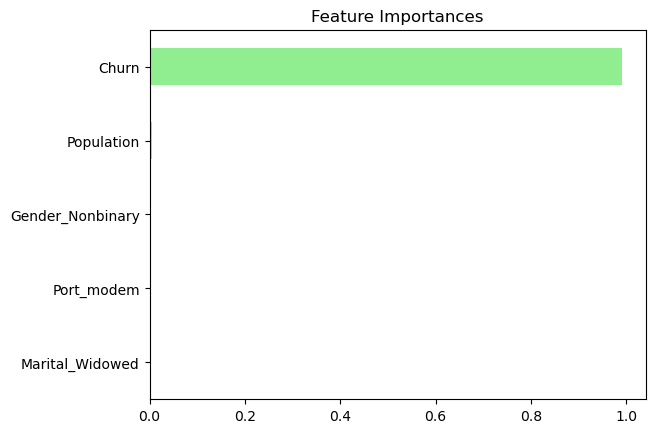

In [133]:
# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importances')
plt.show()

In [134]:
print('Mean Squared Error (MSE) on Training Data: ',round(rfrcv.best_score_,3))
print('Mean Squared Error (MSE) on Testing Data: ',round(mse(y_test,y_pred),3))

Mean Squared Error (MSE) on Training Data:  0.24
Mean Squared Error (MSE) on Testing Data:  543.318


In [135]:
print('Root Mean Squared Error (RMSE) on Training Data: ',round((rfrcv.best_score_)**(1/2),3))
print('Root Mean Squared Error (RMSE) on Testing Data: ',round(mse(y_test, y_pred, squared=False),3))

Root Mean Squared Error (RMSE) on Training Data:  0.49
Root Mean Squared Error (RMSE) on Testing Data:  23.309


In [136]:
print('R-squared score on Training Data: ',round(r2_score(y_train, y_train_pred),3))
print('R-squared score on Testing Data: ',round(r2_score(y_test, y_pred),3))

R-squared score on Training Data:  0.243
R-squared score on Testing Data:  0.222


In [137]:
prediction = rfrcv.predict(X_test)

In [138]:
mse1 = mse(y_test, prediction)
rmse1 = mse1**.5
print(mse1)
print(rmse1)

543.3178065489346
23.309178590180622


In [139]:
score = rfrcv.score(X_test, y_test)
print(score)

0.2220077936485153
